In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
# các thư viện cần thiết cho linear regresison
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
#Các thư viện cần thiết cho SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
#Các thư viện cần thiết cho DecisionTree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
# Các thư viện cần thiết cho GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
# Các thư viện cần thiết cho Stacking
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone



In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/loctv1705/project_nmkhdl/main/data_for_model.csv")

In [3]:
df=df.drop(columns=['district'])

In [ ]:
df.describe()


,price,area,bedroom,bathroom,facade,urgent,floor,mean_land_price_of_district,facility
count,2606.000000,2606.000000,2606.000000,2606.000000,2606.000000,2606.000000,2606.000000,2606.000000,2606.000000
mean,4.816564,53.492705,2.726784,2.353415,0.572909,0.290867,2.418457,0.096945,0.934382
std,1.620553,18.597127,1.152727,1.195883,0.494751,0.454250,0.956425,0.016744,1.126505
min,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060631,0.000000
25%,3.640000,40.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.079905,0.000000
50%,4.700000,52.000000,3.000000,2.000000,1.000000,0.000000,2.000000,0.102650,1.000000
75%,5.800000,64.975000,4.000000,3.000000,1.000000,1.000000,3.000000,0.110572,2.000000
max,9.000000,102.000000,7.000000,6.000000,1.000000,1.000000,4.000000,0.142585,5.000000


In [ ]:
df.head(20)

,price,area,bedroom,bathroom,facade,urgent,floor,mean_land_price_of_district,facility
0,5.50,51.0,1.0,1.0,0.0,0.0,3.0,0.108190,0.0
1,4.60,45.0,2.0,2.0,1.0,0.0,2.0,0.123080,2.0
2,7.35,41.0,1.0,1.0,1.0,1.0,2.0,0.142585,0.0
3,5.00,96.0,2.0,1.0,0.0,0.0,2.0,0.089779,2.0
4,4.00,33.0,3.0,3.0,1.0,0.0,3.0,0.110572,1.0
5,1.00,12.0,2.0,1.0,0.0,0.0,2.0,0.099759,0.0
6,8.99,85.0,7.0,3.0,1.0,1.0,2.0,0.089779,0.0
7,7.39,53.0,4.0,4.0,1.0,0.0,4.0,0.103486,1.0
8,4.75,50.0,3.0,1.0,1.0,0.0,1.0,0.110572,2.0
9,5.50,40.0,1.0,1.0,0.0,0.0,4.0,0.108190,0.0


In [4]:
X,y=df.drop(columns=['price']),df['price']

In [5]:
X,y=np.array(X),np.array(y)

In [6]:
#chuẩn hóa bộ dữ liệu
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [7]:
# chia tập dữ liệu thành 2 tập train và test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Baseline model**

1. Giới thiệu

Trong các dự án về machine learning, việc sử dụng một mô hình cơ sở (baseline model) là bước đầu quan trọng để đánh giá hiệu suất của các mô hình phức tạp hơn. Linear Regression, một trong những mô hình machine learning cơ bản và phổ biến nhất, thường được chọn làm baseline model do tính đơn giản và hiệu quả của nó trong nhiều bài toán dự đoán.

2. Khái niệm cơ bản về linear regression

Linear Regression là một mô hình thống kê dùng để dự đoán giá trị của một biến phụ thuộc dựa trên giá trị của một hoặc nhiều biến độc lập. Phương trình của Linear Regression đơn giản có dạng:

$y = β_0 + β_1 X_1 + β_2 X_2 +...+ β_n X_n + ϵ$

Trong đó:

- $y$ là biến phụ thuộc (target)
- $β_0$ là hệ số chặn (intercept)
- $β_1, β_2, ..., β_n$ là các hệ số hồi quy cần tìm
- $x_1, x_2, ..., x_n$ là các biến độc lập
- $ϵ$ là sai số.

3. Ưu Điểm của Linear Regression

- Đơn Giản và Dễ Hiểu: Linear Regression dễ dàng triển khai và giải thích, giúp người dùng nhanh chóng nắm bắt được mối quan hệ giữa các biến, kiến thức nền về toán cũng đơn giản hơn đa số các mô hình khác.

- Hiệu Quả Tính Toán: Linear Regression không yêu cầu nhiều tài nguyên tính toán, phù hợp cho các bài toán với dữ liệu lớn.

- Độ Chính Xác Khá Tốt: Trong nhiều trường hợp, đặc biệt là với các bộ dữ liệu có mối quan hệ tuyến tính giữa các biến, linear regression cung cấp độ chính xác tương đối tốt.

4. Nhược Điểm của Linear Regression

- Giả Định Tuyến Tính: Linear Regression giả định mối quan hệ tuyến tính giữa các biến nên có thể mô hình này không phù hợp với dữ liệu phức tạp.

- Nhạy Cảm với các giá trị ngoại lai: Linear Regression rất nhạy cảm với các giá trị ngoại lai (outliers), có thể làm sai lệch kết quả dự đoán.

- Đa Cộng Tuyến (Multicollinearity): Khi các biến độc lập có mối quan hệ tương quan mạnh với nhau, Linear Regression có thể gặp vấn đề về đa cộng tuyến.

5. Phương Pháp

Trong dự án này, Linear Regression được sử dụng làm baseline model để dự đoán giá trị của giá nhà (price) dựa trên tập hợp các biến độc lập, bao gồm: 'area': diện tích, 'bedroom': số phòng ngủ,	'bathroom': số phòng tắm (vệ sinh),	'facade': mặt tiền,	'urgent': bán gấp hay không, 	'floor': số tầng, 	'mean_land_price_of_district': giá đất trung bình của quận và	'facility': cở sở vật chất xung quanh.

In [ ]:
# Hàm vẽ các biểu đồ
def test_plot(model, X_test, y_test):
    y_pred = model.predict(X_test)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
    ax[0].scatter(X_test[:, 0], y_test, color = 'red', label = 'Actual')
    ax[0].scatter(X_test[:, 0], y_pred, color = 'blue', label = 'Predicted')
    ax[0].set(xlabel = 'Area', ylabel = 'Price', title = 'Area vs Price')
    ax[0].legend(loc = 'upper left')
    ax[0].grid()

    y_pred_sorted = np.sort(y_pred, axis=0)
    y_test_sorted = np.sort(y_test, axis=0)
    ax[1].plot(y_test_sorted, color = 'red', label = 'Actual')
    ax[1].plot(y_pred_sorted, color = 'blue', label = 'Predicted')
    ax[1].set(xlabel = 'Sorted samples', ylabel = 'Price')
    ax[1].legend(loc = 'upper left')
    ax[1].grid()

In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"Training size: \tX_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape}, y_test: {y_test.shape}")

Training size: 	X_train: (2084, 8), y_train: (2084, 1)
Testing size: 	X_test: (522, 8), y_test: (522, 1)


In [ ]:
# Huấn luyện linear regression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Hệ số hồi quy và hệ số chặn

print('Intercept:', linear_regression.intercept_)
print('Coefficients:', linear_regression.coef_)

Intercept: [4.80842255]
Coefficients: [[ 0.908165    0.07597528  0.15719067  0.18111318 -0.1384908   0.37703338
   0.50335158 -0.04030403]]


In [ ]:
# Đánh giá mô hình bằng mean squared error
y_train_pred = linear_regression.predict(X_train) # dự đoán trên tập train
y_test_pred = linear_regression.predict(X_test) # dự đoán trên tập test
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"==> Train MSE: {mse_train:.5f}")
print(f"==> Test MSE: {mse_test:.5f}")

==> Train MSE: 1.40072
==> Test MSE: 1.35313


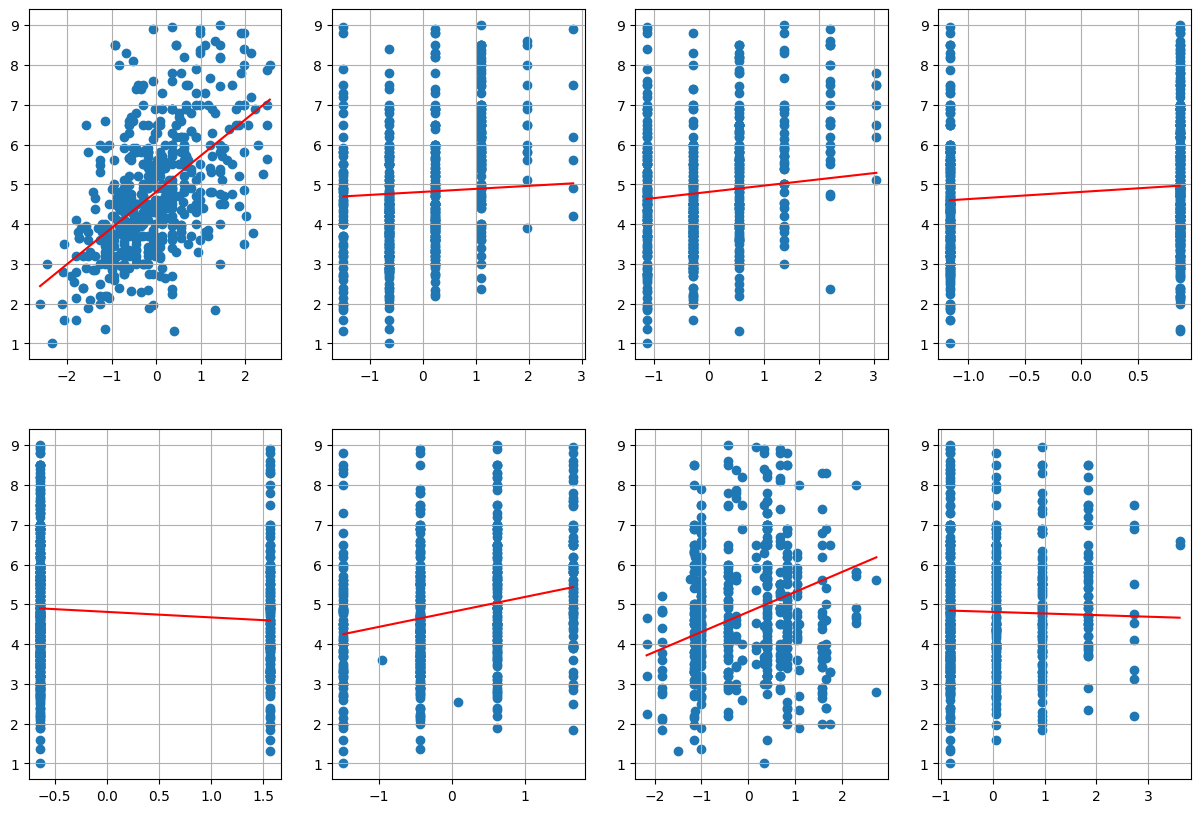

In [ ]:
# vẽ đường hồi quy theo từng feature
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
len_coef = len(linear_regression.coef_[0])
idx = 0
for i in range (int(len_coef/4)):
    for j in range(int(len_coef/2)):
        b0, b1 = linear_regression.intercept_[0], linear_regression.coef_[0][idx]
        X_plot = np.sort(X_test[:, idx])
        y_hat = b0 + b1 * X_plot
        ax[i, j].scatter(X_test[:, idx], y_test)
        ax[i, j].plot(X_plot, y_hat, color='red')
        ax[i, j].grid()
        idx+=1

Text(0.5, 1.0, 'Biểu Đồ Phân Phối Sai Số')

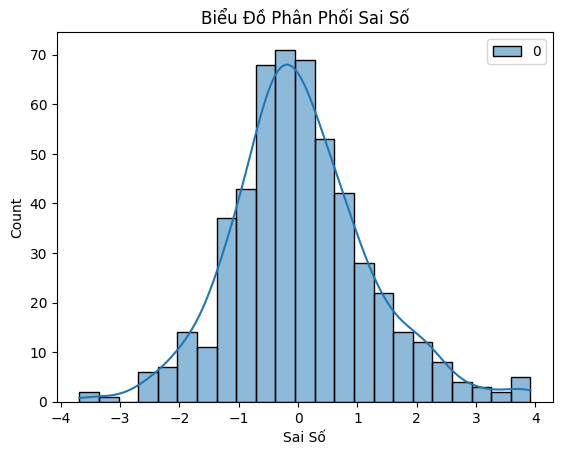

In [ ]:
# Biểu đồ phân phối sai số
sns.histplot((y_test - y_test_pred), kde=True, color="purple")
plt.xlabel('Sai Số')
plt.title('Biểu Đồ Phân Phối Sai Số')

Text(0.5, 1.0, 'Dự đoán vs thực tế')

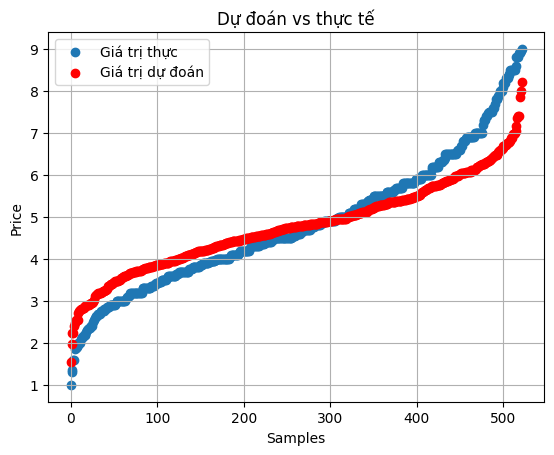

In [ ]:
# so sánh giá trị thực tế và giá trị dự đoán của mô hình
x_axis = np.arange(len(y_test))
plt.scatter(x_axis, np.sort(y_test, axis=0), label='Giá trị thực')
plt.scatter(x_axis, np.sort(y_test_pred, axis=0), label='Giá trị dự đoán', color='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.title('Dự đoán vs thực tế')

6. Kết quả

- Sau khi huấn luyện mô hình Linear Regression, thu được kết quả sau:
Mean Squared Error (MSE) trên tập train: 1.4 tỷ, MSE trên tập test: 1.35
tỷ

- Dựa vào biểu đồ phân phối sai số:
  + Phân bố sai số gần với phân phối chuẩn: Điều này cho thấy rằng sai số được phân bố ngẫu nhiên.
  + Đỉnh của phân phối sai số nằm gần 0: Điều này là dấu hiệu tích cực, cho thấy rằng mô hình không có xu hướng hệ thống trong dự đoán.

In [ ]:
# Tính độ quan trọng của các thuộc tính bằng hệ số hồi quy
X_ = df.drop(columns=['price'])

In [ ]:
coefficients = linear_regression.coef_
coefficients = coefficients.reshape(-1,)
feature_importance = pd.DataFrame({'Feature': X_.columns, 'Importance': coefficients})
feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance['Importance'] = feature_importance['Importance'] / feature_importance['Importance'].sum()
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)

Text(0.5, 1.0, 'Feature Importance')

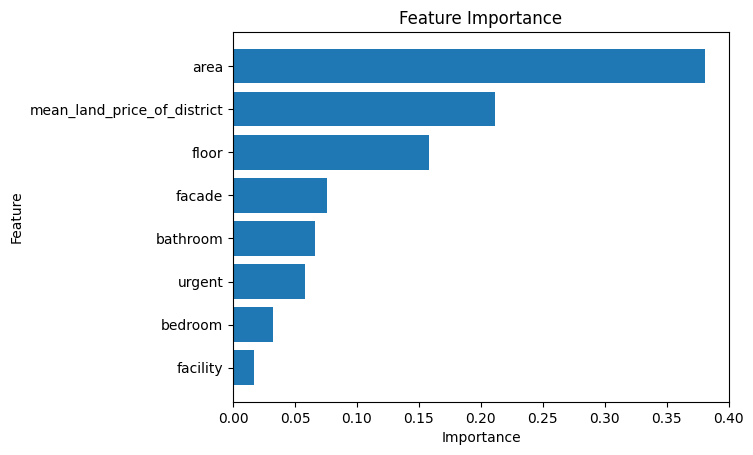

In [ ]:
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

- Dựa vào biểu đồ trên ta có thể thấy được thuộc tính area (diện tích) là quan trọng nhất có ảnh hưởng lớn nhất đến price (giá nhà), thuộc tính 'mean_land_price_of_district' (giá đất trung bình của quận) cũng có ảnh hưởng quan trọng (chỉ sau 'area') đến giá nhà và 'facility' là thuộc tính ít quan trọng nhất. Qua đó ta có thể dựa vào những thuộc tính quan trọng để dự đoán giá nhà.

# **Ridge Regression**

Mô hình Ridge Regression có dạng $y = β0 + β1 X1 + β2 X2 + ... + βn Xn + ε$, tương tự như hồi quy tuyến tính thông thường, nhưng thêm một thành phần điều chỉnh (regularization term) vào quá trình ước lượng các hệ số.

Cụ thể, Ridge Regression thêm một thành phần phạt vào hàm mục tiêu của phương pháp bình phương tối thiểu (Ordinary Least Squares - OLS), nhằm mục đích tối thiểu hóa hàm: $J(β) = ||y - Xβ||^2 + α||β||^2$, trong đó $||y - Xβ||^2$ là tổng bình phương của các sai số, $||β||^2$ là bình phương chuẩn L2 của vector hệ số, và α là tham số điều chỉnh (regularization parameter) kiểm soát mức độ phạt.

Bằng cách giải hệ phương trình chuẩn điều chỉnh $(X^T X + αI) β = X^T y$, trong đó $I$ là ma trận đơn vị, Ridge Regression giúp hạn chế các hệ số hồi quy không trở nên quá lớn, từ đó giảm thiểu hiện tượng overfit và cải thiện khả năng dự đoán của mô hình.

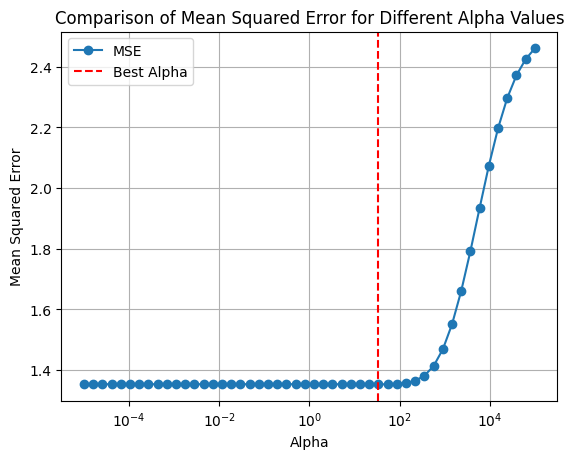

In [ ]:
# Huấn luyện và đánh giá các mô hình Ridge với các giá trị alpha
ridge_alphas = np.logspace(-5, 5, 50)
mse_values_ridge = []
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values_ridge.append(mse)

plt.plot(ridge_alphas, mse_values_ridge, marker='o', label='MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Alpha Values')
plt.axvline(x=ridge_alphas[np.argmin(mse_values_ridge)], color='r', linestyle='--', label='Best Alpha')
plt.legend()
plt.grid()

In [ ]:
ridge_best_alpha = ridge_alphas[np.argmin(mse_values_ridge)]

In [ ]:
# Huấn luyện ridge với best alpha vừa tìm được

ridge_best = Ridge(alpha=ridge_best_alpha)
ridge_best.fit(X_train, y_train)

Ridge(alpha=33.9322177189533)

In [ ]:
# Mean squared error

mse_train_ridge = mean_squared_error(y_train, ridge_best.predict(X_train))
mse_test_ridge = mean_squared_error(y_test, ridge_best.predict(X_test))

print(f"==> Train MSE: {mse_train_ridge:.5f}")
print(f"==> Test MSE: {mse_test_ridge:.5f}")

==> Train MSE: 1.40121
==> Test MSE: 1.35273


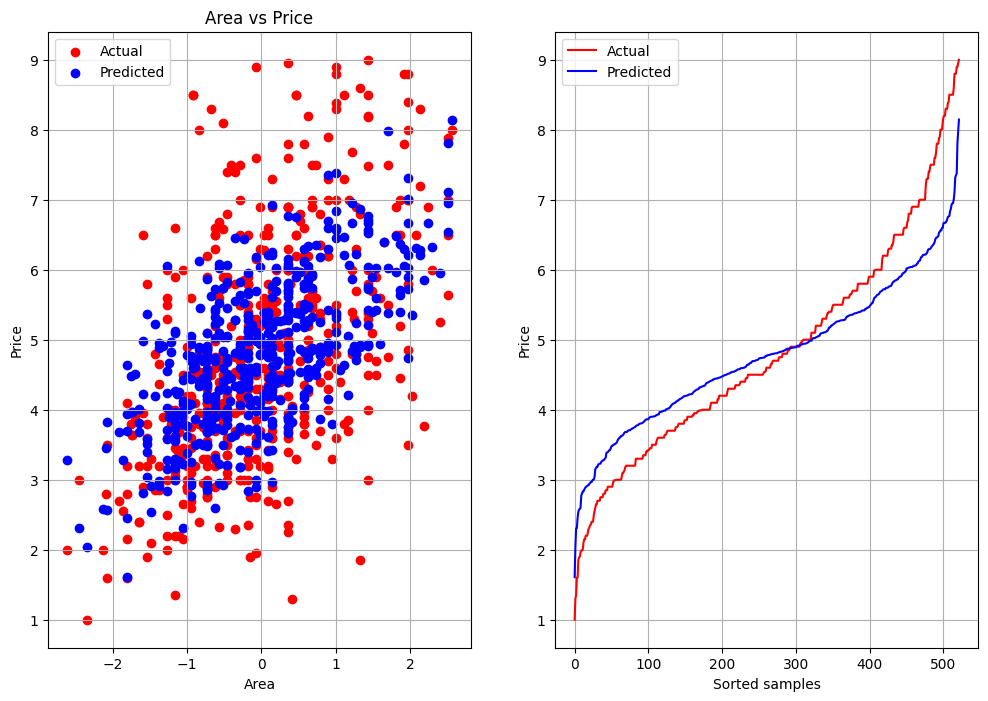

In [ ]:
test_plot(ridge_best, X_test, y_test)

# **Lasso Regression**

Tương tự với Ridge, Lasso Regression thêm một thành phần phạt dựa trên chuẩn L1 vào hàm mục tiêu của phương pháp bình phương tối thiểu (Ordinary Least Squares - OLS), nhằm mục đích tối thiểu hóa hàm: $J(β) = ||y - Xβ||^2 + α||β||_1$, trong đó $||y - Xβ||^2$ là tổng bình phương của các sai số, $||β||_1$ là chuẩn L1 của vector hệ số, và α là tham số điều chỉnh (regularization parameter) kiểm soát mức độ phạt.

Bằng cách giải hệ phương trình chuẩn với thành phần phạt L1, Lasso Regression có khả năng làm cho một số hệ số hồi quy bằng 0 khi α đủ lớn, từ đó thực hiện lựa chọn đặc trưng. Điều này giúp giảm bớt các features không quan trọng, ngăn chặn overfit và cải thiện khả năng giải thích của mô hình.

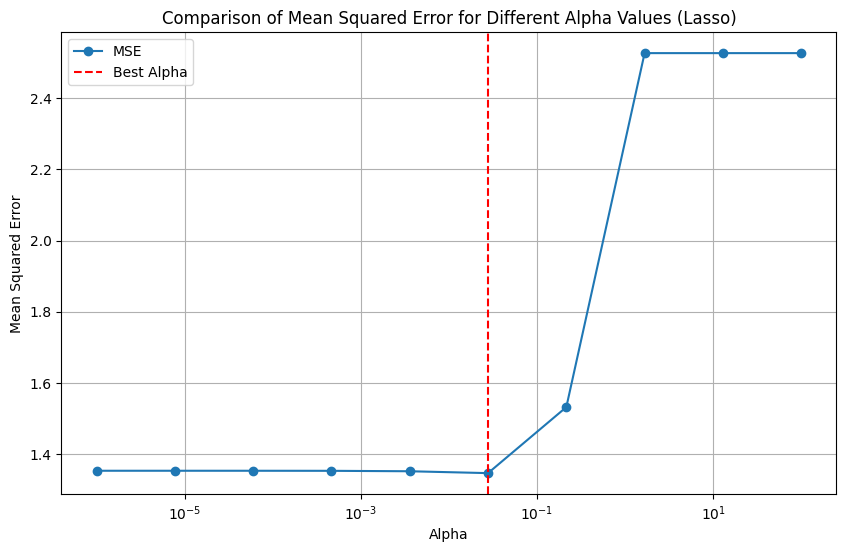

In [10]:
lasso_alphas = np.logspace(-6, 2, 10)
mse_values_lasso = []

# Huấn luyện và đánh giá các mô hình Lasso với các giá trị alpha
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values_lasso.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(lasso_alphas, mse_values_lasso, marker='o', label='MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Alpha Values (Lasso)')
plt.axvline(x=lasso_alphas[np.argmin(mse_values_lasso)], color='r', linestyle='--', label='Best Alpha')
plt.legend()
plt.grid(True)

In [11]:
lasso_best_alpha = lasso_alphas[np.argmin(mse_values_lasso)]

In [12]:
# Huấn luyện lasso với best alpha vừa tìm được

lasso_best = Lasso(alpha = lasso_best_alpha)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.02782559402207126)

In [13]:
# Mean squared error

mse_train_lasso = mean_squared_error(y_train, lasso_best.predict(X_train))
mse_test_lasso = mean_squared_error(y_test, lasso_best.predict(X_test))

print(f"==> Train MSE: {mse_train_lasso:.5f}")
print(f"==> Test MSE: {mse_test_lasso:.5f}")

==> Train MSE: 1.40603
==> Test MSE: 1.34647


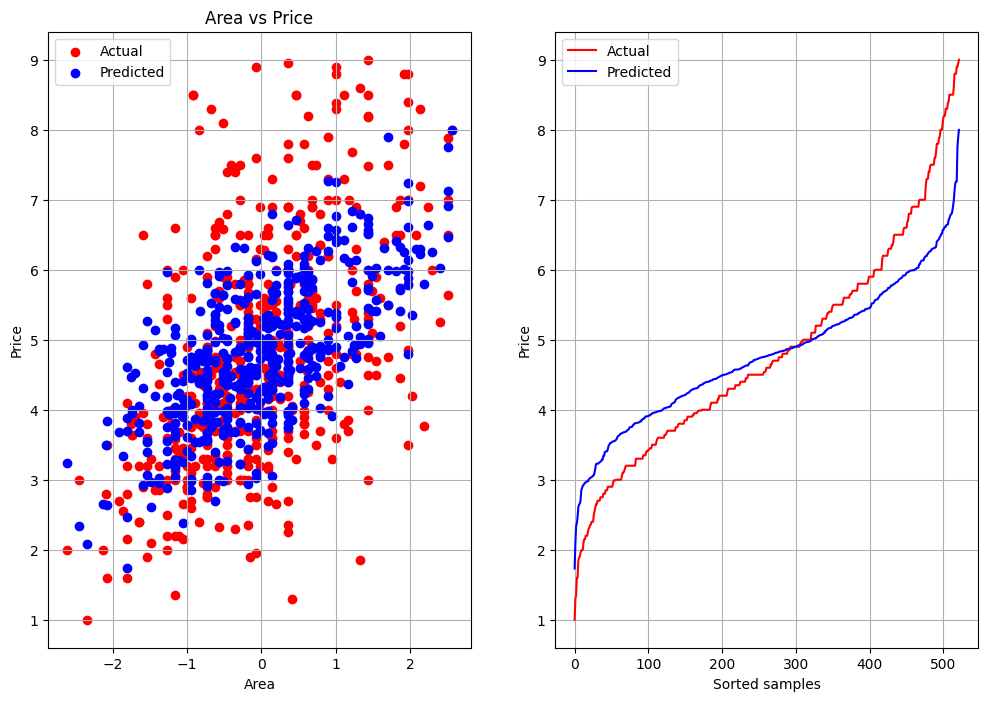

In [ ]:
test_plot(lasso_best, X_test, y_test)

# **Polynomial Regression**

Polynomial regression cũng là 1 biến thể của linear regression. Quá trình huấn luyện mô hình Polynomial Regression bao gồm việc mở rộng không gian đặc trưng (feature space) bằng cách thêm các biến mới là các lũy thừa của biến độc lập ban đầu. Sau đó, hồi quy tuyến tính thông thường được áp dụng trên các biến mở rộng này. Ví dụ, với biến độc lập X, ta tạo ra các biến mới $X^2, X^3,..., X^n$.

Cụ thể, Scikit-learn sử dụng phương pháp bình phương tối thiểu (Ordinary Least Squares - OLS) để ước lượng các tham số β. Mục tiêu của OLS là tối thiểu hóa tổng bình phương của các sai số giữa giá trị thực tế và giá trị dự đoán.

Một trong những thách thức của Polynomial Regression là nguy cơ overfit, đặc biệt khi bậc của đa thức (degree) quá cao. Để giảm thiểu hiện tượng này, có thể sử dụng các kỹ thuật điều chỉnh như Ridge hoặc Lasso Regression để điều chỉnh các hệ số hồi quy.

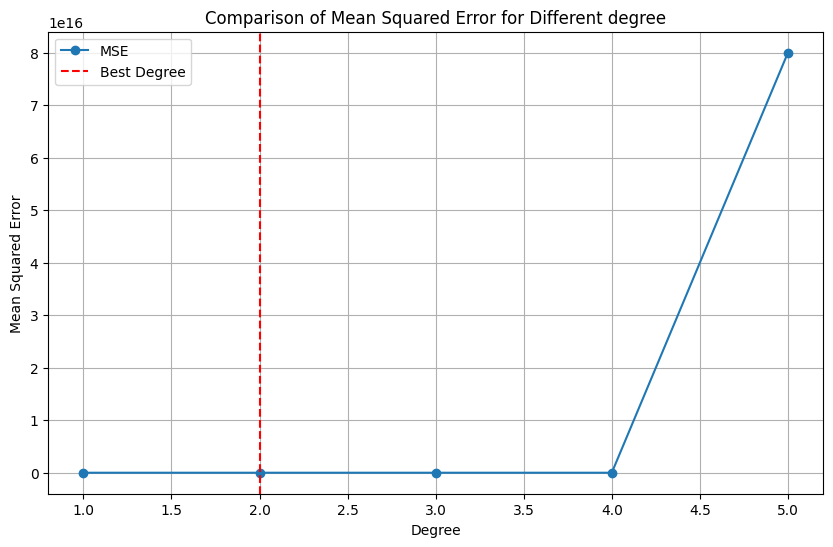

In [ ]:
# Thử với nhiều bậc (degree)

degrees = [1, 2, 3, 4, 5]
mse_values_poly = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.fit_transform(X_test)

    lr_poly_ndegree = LinearRegression(fit_intercept=True)
    lr_poly_ndegree.fit(X_train_trans, y_train)

    y_pred_poly_ndegree = lr_poly_ndegree.predict(X_test_trans)
    mse = mean_squared_error(y_test, y_pred_poly_ndegree)
    mse_values_poly.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values_poly, marker='o', label='MSE')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different degree')
plt.axvline(x=degrees[np.argmin(mse_values_poly)], color='r', linestyle='--', label='Best Degree')
plt.legend()
plt.grid()

In [ ]:
best_degree = degrees[np.argmin(mse_values_poly)]

In [ ]:
# Chuyển đổi dữ liệu

poly = PolynomialFeatures(degree=best_degree)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [ ]:
# Huấn luyện mô hình với dữ liệu đã được chuyển đổi

lr_poly = LinearRegression(fit_intercept = True)
lr_poly.fit(X_train_trans, y_train)

LinearRegression()

In [ ]:
# Mean squared error

mse_train_poly = mean_squared_error(y_train, lr_poly.predict(X_train_trans))
mse_test_poly = mean_squared_error(y_test, lr_poly.predict(X_test_trans))

print(f"==> Train MSE: {mse_train_poly:.5f}")
print(f"==> Test MSE: {mse_test_poly:.5f}")

==> Train MSE: 1.24553
==> Test MSE: 1.28149


In [ ]:
# Ridge + polynomial

ridge_poly = Ridge(alpha=ridge_best_alpha)
ridge_poly.fit(X_train_trans, y_train)

y_pred_ridge_poly = ridge_poly.predict(X_test_trans)

mse_ridge_poly = mean_squared_error(y_test, y_pred_ridge_poly)
mse_ridge_poly

1.2787388371795299

In [ ]:
# Lasso + polynomial

lasso_poly = Lasso(alpha=lasso_best_alpha)
lasso_poly.fit(X_train_trans, y_train)

y_pred_lasso_poly = lasso_poly.predict(X_test_trans)

mse_lasso_poly = mean_squared_error(y_test, y_pred_lasso_poly)
mse_lasso_poly

1.2953317132312983

# **ElasticNet**

ElasticNet cũng là một biến thể của hồi quy tuyến tính, kết hợp giữa Lasso và Ridge Regression để thực hiện điều chỉnh. ElasticNet giúp cân bằng giữa việc chọn lựa đặc trưng (feature selection) và ngăn ngừa overfitting. Mô hình ElasticNet có dạng $y = β_0 + β_1 X_1 + β_2 X_2 + ... + βn Xn + ε$, trong đó $β0$ là hệ số chặn, $β_1, β_2, ... , β_n$ là các hệ số hồi quy, và ε là sai số ngẫu nhiên.

ElasticNet thêm hai thành phần phạt vào hàm mục tiêu của phương pháp bình phương tối thiểu (Ordinary Least Squares - OLS), nhằm mục đích tối thiểu hóa hàm mục tiêu: $J(β) = ||y - Xβ||^2 + α_1||β||_1 + α_2||β||^2$, trong đó $||y - Xβ||^2$ là tổng bình phương của các sai số, $||β||_1$ là chuẩn L1 của vector hệ số (giống Lasso), $||β||^2$ là bình phương chuẩn L2 của vector hệ số (giống Ridge), và $α_1, α_2$ là các tham số điều chỉnh kiểm soát mức độ phạt.

In [ ]:
ratio = np.linspace(0.1, 1, 100)
elastic_net_cv = ElasticNetCV(l1_ratio=ratio, n_alphas=100, cv=5, random_state=42)

elastic_net_cv.fit(X_train, y_train.reshape(-1,))

best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

print(f'Best alpha: {best_alpha}')
print(f'Best l1_ratio: {best_l1_ratio}')

# Predict
y_pred = elastic_net_cv.predict(X_test)

# Tính MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Best alpha: 0.007822277460081456
Best l1_ratio: 0.1
Mean Squared Error: 1.3525345122799743


In [ ]:
# Tạo mô hình ElasticNet tốt nhất cho bộ dữ liệu
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.007822277460081456, l1_ratio=0.1)

# **Suppor Vector Regressor**


1. Đối với dữ liệu tuyến tính hoặc gần tuyến tính Chúng ta cố gắng tạo ra một siêu phẳng có dạng f(x)=⟨w,x⟩+b, trong đó:
 - w là vector trọng số
 - x là vector đầu vào
 - b là hệ số chặn
 - ⟨w,x⟩ là tích vô hướng
 2. Trước khi sấp xĩ những giá trị mục tiêu trong một khoảng biên 𝜖, SVR sử dụng 𝜖 như là một khoảng để tính hàm lỗi:
 $$
\begin{cases}0 & \text { if }|y-f(x)| \leq \epsilon \\ |y-f(x)|-\epsilon & \text { otherwise }\end{cases}
$$

3. Tối ưu hàm lỗi
$$
\min _{w, b} \frac{1}{2}\|w\|^2+C \sum_{i=1}^n\left(\xi_i+\xi_i^*\right)
$$
subject to:
$$
\begin{aligned}
& y_i-\left\langle w, x_i\right\rangle-b \leq \epsilon+\xi_i \\
& \left\langle w, x_i\right\rangle+b-y_i \leq \epsilon+\xi_i^* \\
& \xi_i, \xi_i^* \geq 0
\end{aligned}
$$

- Với C là siêu tham số dùng để điều chỉnh sự cân bằng giữa việc sai số thấp và giảm thiểu $\|w\|^2$
- $\xi_i$ và $\xi_i^*$ là các biến phụ cho mỗi điểm dữ liệu để cho phép nằm ngoài lề khoảng  $\epsilon$
- Để tối ưu hàm trên ta sử dụng công thức Lagrange để tối ưu hàm có điều điện.
$\begin{aligned} \mathcal{L}\left(w, \xi^*, \xi, \lambda, \lambda^*, \alpha, \alpha^*\right)= & \frac{1}{2}\|w\|^2+C \sum_{i=1}^N \xi_i+\xi_i^*+\sum_{i=1}^N \alpha_i^*\left(y_i-w^T x_i-\varepsilon-\xi_i^*\right) \\ & +\sum_{i=1}^N \alpha_i\left(-y_i+w^\tau x_i-\varepsilon-\xi_i\right)-\sum_{i=1}^N \lambda_i+\lambda_i^* \xi_i^*\end{aligned}$
-Tính gradient của hàm $ \mathcal{L}\left(w, \xi^*, \xi, \lambda, \lambda^*, \alpha, \alpha^*\right) $ thay các kết quả tính được, ta được công thức ở phần 4

4. Công thức kép
$$
\begin{aligned}
& \max _{\alpha, \alpha^*}-\frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n\left(\alpha_i-\alpha_i^*\right)\left(\alpha_j-\alpha_j^*\right)\left\langle x_i, x_j\right\rangle-\epsilon \sum_{i=1}^n\left(\alpha_i+\alpha_i^*\right)+\sum_{i=1}^n y_i\left(\alpha_i-\right. \\ & \left.\alpha_i^*\right) \\
& \text { subject to: } \\
& \sum_{i=1}^n\left(\alpha_i-\alpha_i^*\right)=0 \\
& 0 \leq \alpha_i, \alpha_i^* \leq C
\end{aligned}
$$
- Với $\alpha_i$ and $\alpha_i^*$ là những hệ số Lagrange
5. Kernel Function
- Đối với những bộ dữ liệu phi tuyến, ta phải đổi bộ dữ liệu đang có sang một không gian nhiều chiều khác sao cho bộ dữ liệu có thể là tuyến tính hoặc gần tuyến tính.
-Tuy nhiên việc tính $ \Phi(\mathbf{x}) $ trực tiếp từng điểm dữ liệu sang không gian với và tính tích vô hướng $ \left\langle x_i, x_j\right\rangle $ với từng điểm dữ liệu đã được ánh xạ sẽ tốn rất nhiều chi phí và thời gian.
-Thay vào đó ta chỉ cần tính trực tiếp $\left\langle \Phi(\mathbf{x}), \Phi(\mathbf{z}) \right\rangle $ cho hai điểm dữ liệu bất kì, đó ta gọi đó là Kernel Trick.
- Ta có một số Kernel function thông dụng
-Linear kernel: $K\left(x_i, x_j\right)=\left\langle x_i, x_j\right\rangle$
- Polynomial kernel: $K\left(x_i, x_j\right)=\left(\gamma\left\langle x_i, x_j\right\rangle+r\right)^d$
-Radial basis function (RBF) kernel: $K\left(x_i, x_j\right)=\exp \left(-\gamma\left\|x_i-x_j\right\|^2\right)$
6. Dự đoán
- Sau khi tìm được các giá tối ưu cho $\alpha_i$ và $\alpha_i^*$, ta đi dự đoán giá trị cho điểm dữ liệu mới
$$
f(x)=\sum_{i=1}^n\left(\alpha_i-\alpha_i^*\right) K\left(x_i, x\right)+b
$$







  



Ưu điểm của SVM trong bài toán này
- Khả năng xử lý dữ liệu phi tuyến tính: Bằng cách sử dụng các hàm kernel, SVM có thể xử lý các vấn đề hồi quy phi tuyến khi Linear Model vẫn chưa cho kết quả tốt thì việc sử dụng cấc kernel là hoàn toàn phù hợp.
- SVM có cơ chế tối ưu hóa rõ ràng, giúp ngăn chặn hiện tượng overfitting, đặc biệt là khi sử dụng các hàm kernel phù hợp.

In [ ]:
# chia tập dữ liệu thành 2 tập train và test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Xử dụng grid-search để tìm siêu tham số tối ưu cho mô hình
# Thử nghiệm với Kernel Poly
grid_poly = GridSearchCV(
    SVR(kernel="poly", gamma=0.1,epsilon=0.1, coef0=1),
    param_grid={"C":[1e0, 1e1],
                "degree":[2,3,4,5]},
)
grid_poly.fit(X_train, y_train) # Huấn luyện mô hình

GridSearchCV(estimator=SVR(coef0=1, gamma=0.1, kernel='poly'),
             param_grid={'C': [1.0, 10.0], 'degree': [2, 3, 4, 5]})

In [ ]:
grid_poly.best_params_ #Tham số tốt nhất của mô hình

{'C': 1.0, 'degree': 2}

In [ ]:
best_poly=SVR(kernel="poly",C=1,degree=2,gamma=0.1,epsilon=0.1, coef0=1)
best_poly.fit(X_train,y_train)

SVR(C=1, coef0=1, degree=2, gamma=0.1, kernel='poly')

In [ ]:
print(">>Train set",mean_squared_error(y_train,best_poly.predict(X_train))) # kiểm tra độ hiệu quả của mô hình trên tập train
print(">>Test set",mean_squared_error(y_test,best_poly.predict(X_test))) # kiểm tra độ hiệu quả của mô hình trên tập test

>>Train set 1.2646700636581878
>>Test set 1.3056886010415851


In [ ]:
# Thử nghiệm với Kernel 'rbf'
grid_rbf = GridSearchCV(
    SVR(kernel="rbf"),
    param_grid={"C": [1e0, 1e1], "gamma": np.logspace(-1, 1, 20),
                "epsilon": np.logspace(-1, 1, 20)}
)
grid_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.0, 10.0],
                         'epsilon': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'gamma': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

In [ ]:
# Tham số tốt nhất cho mô hình
grid_rbf.best_params_

{'C': 1.0, 'epsilon': 0.33598182862837817, 'gamma': 0.1}

In [ ]:
# Khởi tạo mô hình với tham số tốt nhất
best_rbf=SVR(kernel="rbf",C=1,gamma=0.1,epsilon= 0.33598182862837817,)
best_rbf.fit(X_train,y_train)

SVR(C=1, epsilon=0.33598182862837817, gamma=0.1)

In [ ]:
# xuất giá trị MSE trên hai tập train và test
print(">>Train set:",mean_squared_error(y_train,best_rbf.predict(X_train)))
print(">>Test set:",mean_squared_error(y_test,best_rbf.predict(X_test)))

>>Train set: 1.1269420986276086
>>Test set: 1.2685328621829737


Vậy bộ tham số tối ưu cho SVR:kernel='rbf', C=1, epsilon=0.33598182862837817, gamma=0.1

Bằng việc tính MSE trên tập test sau khi train mô hình SVR bằng hai kernel khác nhau, chúng ta có thể thấy độ hiệu quả của kernel 'Radial basis function' là hiệu quả hơn so với kernel 'Polynomial' chính vì vậy trên tập dữ liệu này ta sẽ sử dụng 'rbf' để dự đoán.

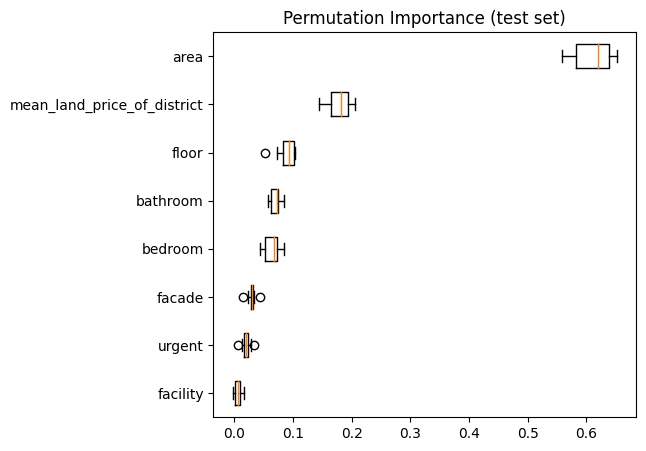

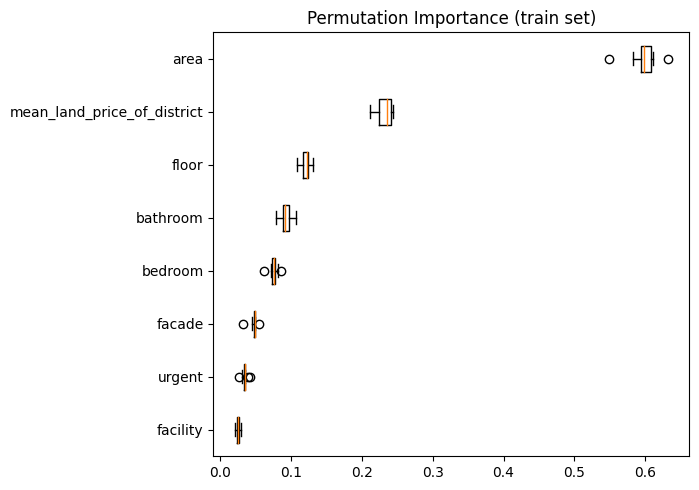

In [ ]:
#Kiểm tra tính quan trọng của từng feature trên các tập train và test
result_test = permutation_importance(
    best_rbf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result_test.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(
    result_test.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (test set)")

result_train = permutation_importance(
    best_rbf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result_train.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.boxplot(
    result_train.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (train set)")
fig.tight_layout()
plt.show()

- Biểu đồ permutation importance cho thấy rằng 'Area' (diện tích) và 'Mean Land Price of District' (giá đất trung bình của quận) là những đặc trưng ảnh hưởng nhất đến dự đoán giá nhà. Các đặc trưng như 'Floor' (số tầng), 'Bathroom' (số phòng tắm), và 'Bedroom' (số phòng ngủ) cũng quan trọng nhưng ít hơn, trong khi 'Facade', 'Urgent', và 'Facility' có ít ảnh hưởng hơn.
- Sự thể hiện này cho thấy những phát hiện của mô hình là đúng đắn khi xếp hạng độ quan trọng trên hai tập test và train là như nhau.


# **Decision Tree**

Sử dụng cây quyết định để sử dụng trong bài toán hồi qui, dự đoán giá nhà

Trước khi nâng cấp hiệu quả thuật toán thì chạy demo trước

In [ ]:
demo_model = DecisionTreeRegressor(random_state=42)
demo_model.fit(X_train, y_train)
y_pred_demo = demo_model.predict(X_test)
demo_mse = mean_squared_error(y_test, y_pred_demo)
demo_r2 = r2_score(y_test, y_pred_demo)
print(f"Demo Model - Mean Squared Error: {demo_mse}, R-squared: {demo_r2}")

Demo Model - Mean Squared Error: 2.3441981387824606, R-squared: 0.0721891264983916


**CÂY QUYẾT ĐỊNH CHẠY THEO CÁC BƯỚC:**
- Bước 1: Tại mỗi nút, khởi tạo tất cả split có thể cho mỗi thuộc tính
- Bước 2: Sử dụng MSE (Mean Squared Error) để xác định split tốt nhất từ các split trong tất cả các thuộc tính, từ đó xác định thuộc tính tốt nhất và split tốt nhất của thuộc tính đó
- Bước 3: Chia tập Data theo 2 tập con dựa theo ngưỡng của nó (best split point hay threshold) tạo ra 2 node con trái và phải dựa theo điều kiện của ngưỡng
- Bước 4:Với mỗi node con, áp dụng lại các bước ở trên cho đến khi gặp phải điều kiện dừng
- Bước 5: Áp dụng, dự đoán với điểm dữ liệu mới

***Bước 1***: Khởi tạo các split theo mỗi thuộc tính bằng cách
- Với mỗi thuộc tính, giá trị mỗi điểm của thuộc tính được xem xét để tạo thành split point
- Với mỗi split point, chia tập dữ liệu thành 2 tập con, một tập nhỏ hơn hoặc bằng split point, tập còn lại lớn hơn
- Tính MSE cho mỗi tập con, sau đó tính MSE tổng từ 2 tập con đó lại, mỗi split point của thuộc tính sẽ có một MSE tổng riêng
- Ta chọn split point có MSE tổng nhỏ nhất và đó là điểm ngưỡng (best split point hay threhold) cho thuộc tính đó

***Bước 2***
- Từ mỗi best split point của mỗi thuộc tính, ta tiếp tục kiếm best split point có giá trị MSE nhỏ nhất (đã tính ở trên)
- Thuộc tính có best split point có giá trị nhỏ nhất được xem là thuộc tính tốt nhất, ta sẽ dùng threshold của thuộc tính này để chia tập Data

***Bước 3***
- Chia tập data thành 2 tập con dựa vào ngưỡng (threshold) được xác định ở trên thành 2 node con trái và phải dựa theo điều kiện của ngưỡng (lớn hơn hay nhỏ hơn)
- 2 Node con sẽ gồm 2 tập dữ liêu con mới cùng theo một điều kiện nào đó của ngưỡng

***Bước 4:***  Liên tục chạy theo ở trên cho đến khi gặp điều kiện dừng, điều kiện dừng ở đây gồm một số điều như
- Cây đạt được số tầng tối đa được đặt ra **'max_depth'**
- Không đạt được số dữ liệu tối thiểu cần thiết để chia một node **'min_samples_split'**
- Không đạt được số dữ liệu tối thiểu cần thiết để tạo thành một node lá **'min_samples_leaf'**
- Không đạt được lượng giảm tối thiểu MSE (impurity decrease) sau mỗi lần chia node **'min_impurity_decrease'**
- Số lượng lá tối đa cây tạo ra được **'max_leaf_nodes'**
- Số lượng thuộc tính tối đa dùng cho một lần split node **'max_features'**
- ...


Không cần phải ấp dụng hết các điều kiện dừng này, nhưng để mô hình có hiệu quả cao nhất thì nên xem xét nên dùng điều kiện dừng nào

***Bước 5:*** Áp dụng dữ đoán điểm dữ liệu mới
- Sau khi đã hoàn thành xong cây dữ đoán thì có thể dùng để dự đoán điểm dữ liệu mới bằng cách cho điểm này chạy qua cây với các ngưỡng, điểm sẽ dừng lại tại một node khi không còn hướng để rẽ tiếp nữa
- Giá trị dự đoán của điểm dữ liệu này sẽ là giá trị trung bình của các điểm có trong node đó


In [ ]:
print(f"Demo Model - Mean Squared Error: {demo_mse}, R-squared: {demo_r2}")

Demo Model - Mean Squared Error: 2.3441981387824606, R-squared: 0.0721891264983916


Với MSE xấp xỉ 2.3454, tìm các phương pháp để giảm con số này xuống

**Pruning the Tree (ngắt cành)**
- Một trong những phương pháp của ngát cành là **Cost-Complexity Pruning** bằng cách điều chỉnh **ccp_alpha**
- Để biết **ccp_alpha** là gì thì phải hiểu **Cost-Complexity Pruning** làm gì
- **Cost-Complexity Pruning** là một kỹ thuật ngắt cành để giảm overfitting và tăng khả năng hiệu quả của thuật toán

Sở lược ngắn gọn hoạt động của **Cost-Complexity Pruning**

**BƯỚC 1**
- Tạo một cây full depth, tức là có nhiều tầng nhất có thể
- Do tạo ra full depth, node lá có số điểm dữ liệu trong đó rất ít, dễ xảy ra overfitting

**BƯỚC 2**
- Tính tham số phức tạp 𝛼 dựa theo công thức

$$
C_\alpha(T)=R(T)+\alpha|T|
$$
Trong đó:
- $R(T)$ là tổng thặng dư bình phương (RSS) của cây con $T$.
- $|T|$ là số lượng node lá của cây con $T$.
- $\alpha$ là tham số phức tạp

Với mỗi node t, tính bình phương thặng dư $R(t)$ với công thức:
$$
R(t)=\sum_{i \in t}\left(y_i-\hat{y}_t\right)^2
$$
- $y_i$ là giá trị thực, $\hat{y}_t$ là giá trị dự đoán tại node $t$

Tính tổng thặng dư bình phương cây con $T$ :
- Với mỗi cây con $T$, tính tổng RSS $R(T)$ là tổng của $R(t)$ cho tất cả những node $t$ nằm trong cây con $T$ :
$$
{R(T)}=\sum_{t \in T} R(t)
$$


Với mỗi lần cắt (bỏ một cây con thành một node lá), tính sự thay đổi thặng dư bình phương $\Delta R$ và sự thay đổi kích cở cây $\Delta|T|$.
- Giá trị $\alpha$ cho mỗi lần cắt được tính là:
$$
\alpha=\frac{\Delta R}{\Delta|T|}
$$
- Hệ số này biểu thị mối quan hệ giữa sự tắng RRS và sự giảm số lượng node
- Hệ số này được tính cho tất cả cây con, từ cây có gần hết node đến cây chỉ có một node
- Với mỗi lần cắt cây con ta thu được nhiều cây với độ phức tạp khác nhau, lấy các tập $\alpha$ đó

BƯỚC 3
- Sử dụng Cross-Validation
- Với mỗi lần chạy sẽ thu được các cây ứng với độ phức tạp đó
- Sử dụng MSE để đánh giá hiệu quả của các cây
- Sau khi chạy Cross-Validation, tính hiệu quả trung bình của cây dựa vào độ phức tạp, $\alpha$ được chọn ứng với trung bình MSE của các cây nhỏ nhất

In [ ]:
#Tập train ở đây được tính như là tập đầy đủ (full_depth)
path = demo_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.00000000e+00, 0.00000000e+00, 8.52378522e-19, ...,
       8.53955600e-02, 2.38084281e-01, 4.43310997e-01])

In [ ]:
# Sử dụng Cross Validation để tìm alpha thích hợp
cv_scores = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))
#cv_scores ở đây là mean MSE ứng với từng alpha
cv_scores

[-2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503271461765588,
 -2.503298329502168,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033099961496186,
 -2.5033488308638985,
 -2.5033488308638985,
 -2.5033488308638985,
 -2.5033488308638985,
 -2.5033503056840423,
 -2.5033503056840423,
 -2.503322366701895,
 -2.503322366701895,
 -2.503322366701895,
 -2.503322366701895,


In [ ]:
# Tìm số alpha lý tưởng, do cv_scores là âm nên tìm max sẽ cho ra được giá trị MSE nhỏ nhất của alpha đó
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]
print(f"Optimal ccp_alpha: {optimal_alpha}")

Optimal ccp_alpha: 0.011092898429487734


In [ ]:
# Chạy lại và cắt cây với giá trị ccp_alpha lý tưởng đã tìm được
pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_alpha)
pruned_model.fit(X_train, y_train)
y_pred_pruned = pruned_model.predict(X_test)
pruned_mse = mean_squared_error(y_test, y_pred_pruned)
pruned_r2 = r2_score(y_test, y_pred_pruned)

# So sánh hiệu quả giữa demo_model và pruned_model
print(f"Demo Model MSE: {demo_mse}, R-squared: {demo_r2}")
print(f"Pruned Model MSE: {pruned_mse}, R-squared: {pruned_r2}")


Demo Model MSE: 2.3441981387824606, R-squared: 0.0721891264983916
Pruned Model MSE: 1.5288458861098544, R-squared: 0.3948976353263123


Giá trị MSE cây cắt nhánh đã tốt hơn nhiều so với Demo

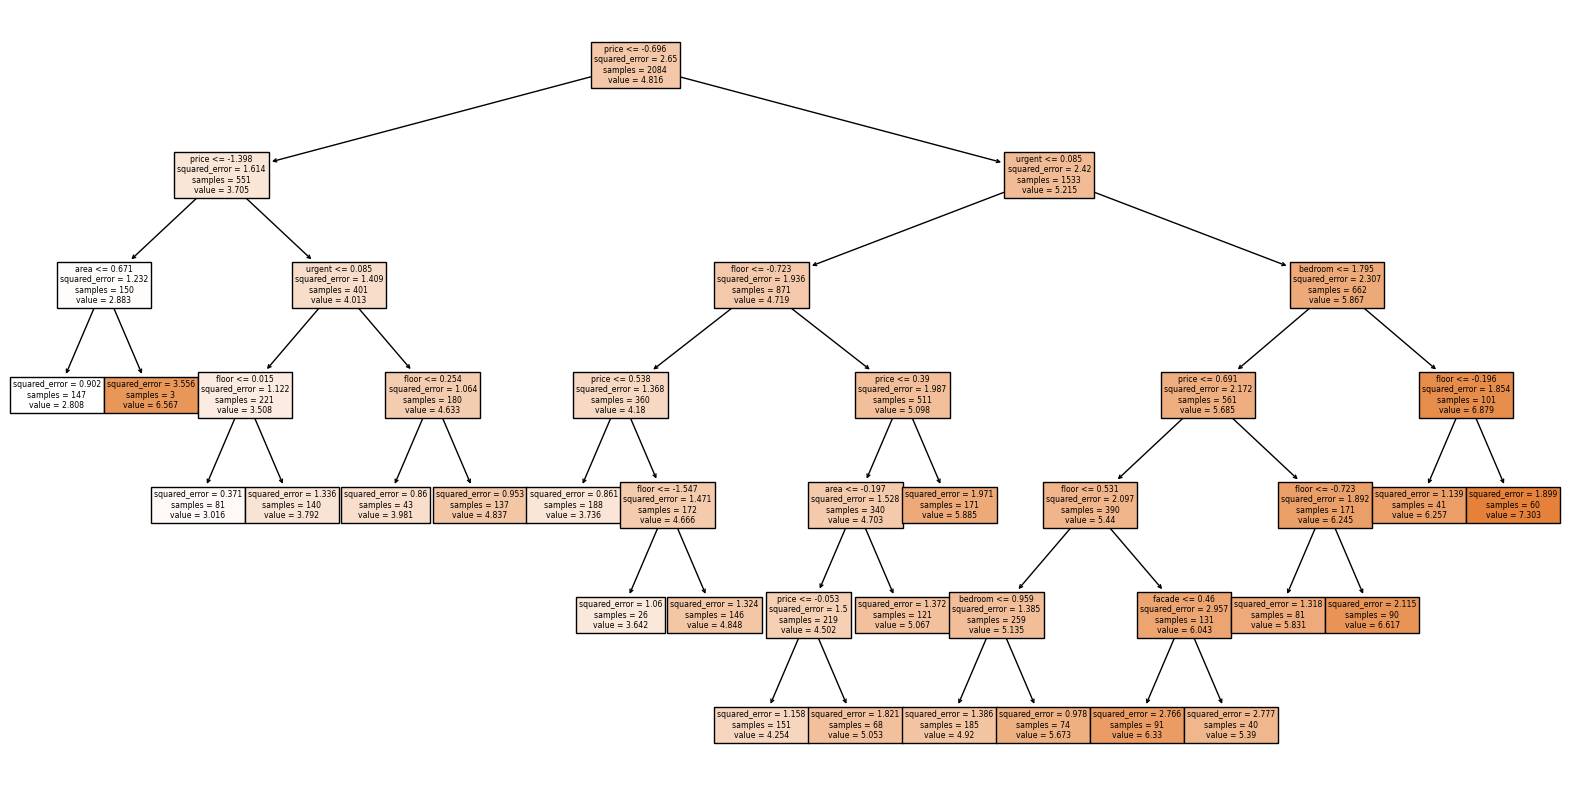

In [ ]:
# Trực quan hóa cây đã cắt
plt.figure(figsize=(20,10))
plot_tree(pruned_model, feature_names=df.columns[:-1], filled=True)
plt.show()

**Tuning Parameter**

Áp dụng Tuning Parameter để tìm ra được các hệ số dừng phù hợp cho cây quyết định hồi quy

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
# Chia lại tập Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chạy lại model
model = DecisionTreeRegressor(random_state=42)

# Dùng Grid Search để tìm tham số tối ưu phù hợp
# Đây là lưới cách tham số mướn tìm
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'ccp_alpha': np.linspace(0, 0.2, 10)
}


In [ ]:
# Sử dụng Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.02222222, 0.04444444, 0.06666667, 0.08888889,
       0.11111111, 0.13333333, 0.15555556, 0.17777778, 0.2       ]),
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
# Lấy các tham số phù hợp và huấn luyện lại mô hình
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# In ra các tham số tốt nhất
print(f"Best Parameters: {best_params}")

Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [ ]:
# Chạy lại MSE
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model - Mean Squared Error: {mse}")
print(f"Best Model - R-squared: {r2}")

Best Model - Mean Squared Error: 1.4279321098772118
Best Model - R-squared: 0.43483832861744487


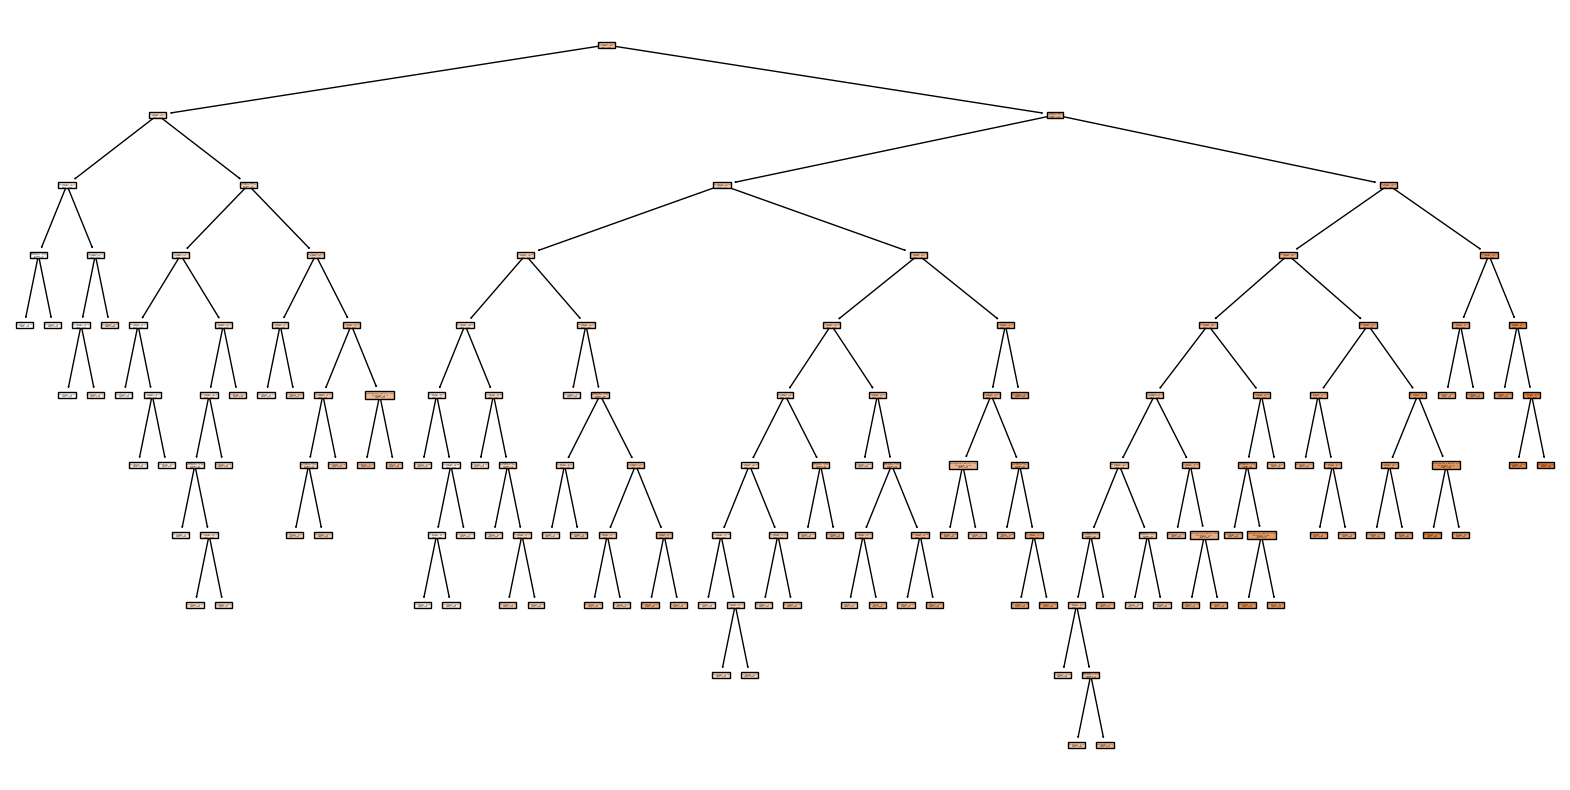

In [ ]:
# Trực quan hóa lại
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=df.columns[:-1], filled=True)
plt.show()


# **Random Forest Regression**

**Rừng ngẫu nhiên hồi quy** là một phương pháp tổng hợp lại tất cả các cây quyết định hồi quy để tạo ra dự đoán đúng hơn và ổn định hơn so với cây quyết định hồi quy riêng lẻ

Sơ lược các bước hoạt động về **rừng ngẫu nhiên hồi quy**

**Bước 1**
- Random Forest Regression sử dụng *Boostrap Sampling* để tạo ra nhiều tập data từ tập Train. Bootstrap Sampling tức là lấy các mẫu ngẫu nhiên từ tập train để tạo ra một tập data mới, một mẫu có thể được lấy ngẫu nhiên nhiều lần trong tâp data mới nên trong mỗi tập data mới sẽ có giá trị trùng nhau và một số mẫu không được bỏ vào

**Bước 2**
- Tạo cây ngẫu nhiên với mỗi tập data mới đó
- Tuy nhiên, **Rừng ngẫu nhiên** sẽ chỉ chọn một phần trong số nhiều thuộc tính để quyết định best split point tạo ra các ngưỡng.
- Điều này sẽ giúp mỗi cây tạo ra mang tính độc nhất hoàn toàn

**Bước 3**
- Để dự đoán với các điểm data mới, sau khi Rừng ngẫu nhiên được thiết lập, điểm này sẽ đi qua tất cả các cây, mỗi cây sẽ cho ra một kết quả dự đoán khác nhau
- Giá trị dự đoán cuối cùng của điểm này sẽ là giá trị trung bình của tất cả các cây mà điểm này đi qua


Ưu điểm của Random Forest
-	Với bộ dữ liệu của nhóm có tận 8 thuộc tính đầu vào để dữ đoán, Random Forest có khả năng tự động học và khai thác được sự tương tác giữa các thuộc tính đầu vào và các điểm dữ liệu với nhau
-	Tập dữ liệu của nhóm không có missing values, nhưng nếu có cũng không phải vấn đề lớn khi sử dụng Random Forest bởi nó có khả năng làm việc với data bị thiếu dữ liệu mà không cần phải điền giá trị thiếu trước đó
-	Random Forest áp dụng tốt cho nhiều bài toán, ở cả hồi quy và phân loại
Nhược điểm Random Forest
-	Không phù hợp với dữ liệu có cấu trúc thời gian, nhược điểm này không đáng lo do trong tập dữ liệu không có nó
-	Nếu không điều chỉnh các tham số phù hợp như số tầng, hệ số phức tạp,… sẽ dễ dẫn đến overfitting
-	Random Forest có thể tốn nhiều tài nguyên tính toán và bộ nhớ, thời gian khi số cây tạo ra lớn và thuộc tính nhiều.
-	Do tính chất của việc kết hợp dự đoán từ nhiều cây quyết định, việc giải thích dự đoán của Random Forest không phải lúc nào cũng dễ dàng như các mô hình khác.
-	Thời gian Tuning Parameter rất lâu do mỗi lần chạy RandomForest phải tạo nhiều cây quyết định

In [ ]:
forest_demo_model = RandomForestRegressor(n_estimators=100, random_state=42,)
forest_demo_model.fit(X_train, y_train)

y_pred = forest_demo_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.2839950020258641
R-squared: 0.4918072390331044


Chỉ với lần chạy demo mô hình đã hiệu quả hơn nhiều so với chỉ một cây quyết định ở trên

**Tuning Parameter**

Tiếp tục sử dụng Grid Search để xác định các tham số tối ưu cho Random Forest

In [ ]:
tuning_model = RandomForestRegressor( random_state=42)

In [ ]:
# Lưới tham số
param = {
    'n_estimators': [20,50,100],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 20],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'ccp_alpha': [0,0.1,0.2]
}

In [ ]:
#Áp dụng GridSearch
grid_search = GridSearchCV(estimator=tuning_model, param_grid=param,
                           cv=5, scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.1, 0.2],
                         'max_depth': [10, 15, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 40],
                         'n_estimators': [20, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In ra các tham số tốt nhất

In [ ]:
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'ccp_alpha': 0, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
#Chạy lại với tham số tốt nhất
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.2385778527300932
R-squared (R2): 0.5097829059628411


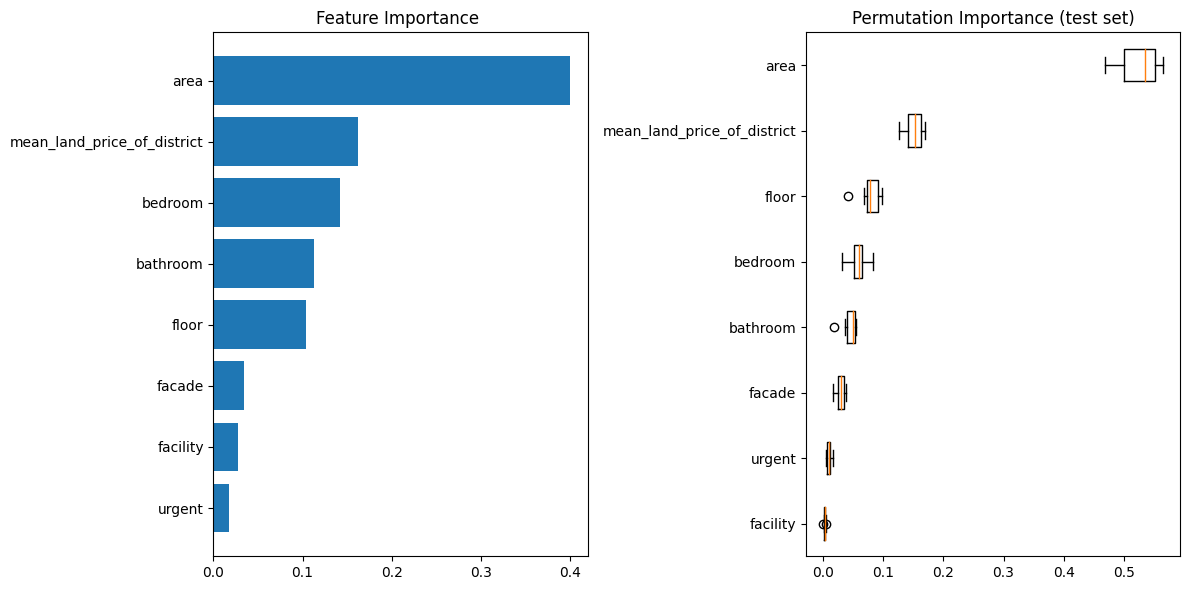

In [ ]:
best_rf=RandomForestRegressor(ccp_alpha= 0.0, max_depth= 20, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators= 500,random_state=42)
best_rf.fit(X_train, y_train)
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns.drop('price'))[sorted_idx])
plt.title("Feature Importance ")

result = permutation_importance(
    best_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

- Biểu đồ permutation importance cho thấy rằng 'Area' (diện tích) và 'Mean Land Price of District' (giá đất trung bình của quận) là những đặc trưng ảnh hưởng nhất đến dự đoán giá nhà. Các đặc trưng như 'Floor' (số tầng), 'Bathroom' (số phòng tắm), và 'Bedroom' (số phòng ngủ) cũng quan trọng nhưng ít hơn, trong khi 'Facade', 'Urgent', và 'Facility' có ít ảnh hưởng hơn.
- Sự thể hiện của mô hình vẫn được thể hiện tốt khi phân loại được ba nhóm đặc trưng, nhờ quá trình hiệu chỉnh và kiểm tra overfiting thì mô hình đã đưa ra được những phát hiện đúng trên cả tập train và test.

In [ ]:
min_val_error = float("inf")
ms_scores = []
error_going_up = 0
for depth in range(5, 30): #Experiment with different n_estimators values
  best_rf.max_depth = depth
  best_rf.fit(X_train, y_train)
  y_pred = best_rf.predict(X_test)
  val_error = mean_squared_error(y_test, y_pred)
  ms_scores.append(val_error)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
  if error_going_up == 10:
    break # early stopping

In [ ]:
depth

25

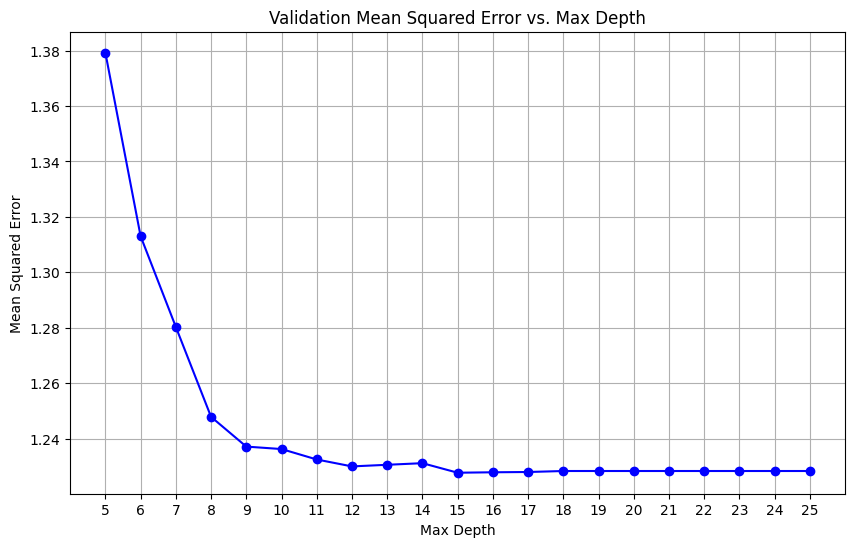

In [ ]:
# Define the range of max_depth values
max_depth_range = range(5, 5 + len(ms_scores))

# Plotting the MSE scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, ms_scores, marker='o', linestyle='-', color='b')
plt.title('Validation Mean Squared Error vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.xticks(max_depth_range)
plt.grid(True)
plt.show()

Dựa vào quy tắc khuỷa tay, Max Depth phù hợp là 9 nhưng để tròn ta chọn là 10 vì cũng không có sự khác biệt

In [ ]:
# Khởi tạo mô hình RandomForestRegressor với tham só tối ưu
best_rf = RandomForestRegressor(ccp_alpha= 0.0, max_depth= 10, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators=500)
best_rf.fit(X_train, y_train)
# Xuất giá trị MSE trên hai tập train và test
train_mse = mean_squared_error(y_train, best_rf.predict(X_train))
test_mse = mean_squared_error(y_test, best_rf.predict(X_test))
print(">>Train:",train_mse)
print(">>Test:",test_mse)

>>Train: 0.9049286489585558
>>Test: 1.2331479509778491


Vậy bộ tham số tối ưu cho mô hình RandomForestRegressor: ccp_alpha= 0.0, max_depth= 10, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators=500

# **Gradient Boosting**

Mô hình Gradient Boosting sử dụng để giải bài toán hồi quy không được xây dựng để học trên các thuộc tính phân loại, do đó 'district' cần phải được loại bỏ khỏi tập dữ liệu.

Đầu vào: Dữ liệu $\left\{\left(\mathbf{x}_i, y_i\right)\right\}_{i=1}^n$ và hàm Loss Function khả vi $L\left(y_i, F(x)\right)$. Hàm Loss Function sử dụng trong bài toán này là sai số bình phương trung bình (mean squared error): $M S E=\frac{1}{N} \sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2$.

Bước 2: Với những giá trị $m=1$ tới $M$ :

(A) Tính $r_{i m}=-\left[\frac{\partial L\left(y_i, F\left(x_i\right)\right)}{\partial F\left(x_i\right)}\right]_{F(x)=F_{m-1}(x)}$ với $i=1, \ldots, n$

(B) Huấn luyện 1 cây hồi quy với mọi $r_{i m}$ và tạo những vùng kết thúc $R_{j m}$, với $j=1 \ldots J_m$

(C) Với $j=1 \ldots J m$, tính $\gamma_{j m}=\underset{\gamma}{\operatorname{argmin}} \sum_{x_i \in R_{i j}} L\left(y_i, F_{m-1}\left(x_i\right)+\gamma\right)$

(D) Cập nhật $F_m(x)$: $F_m(x)=F_{m-1}(x)+\nu \sum_{j=1}^{J_m} \gamma_{j m} 𝟙_\left(x \in R_{j m}\right)$

Ưu điểm/ lý do chọn Gradient Boosting:

  - Hiệu suất cao: Gradient Boosting thường dẫn đến hiệu suất dự đoán tốt hơn so với nhiều phương pháp học máy khác. Đặc biệt là trong các vấn đề liên quan đến dự đoán regression và classification.

  - Học được từ các dữ liệu phi tuyến tính: Gradient Boosting có thể học được các mối quan hệ phức tạp giữa các biến đầu vào và đầu ra mà các mô hình tuyến tính khó có thể mô hình hóa được.

  - Khả năng xử lý dữ liệu lớn: Mô hình Gradient Boosting có thể xử lý được các tập dữ liệu lớn mà không cần quá nhiều tiền xử lý dữ liệu.

  -Khả năng xử lý các biến có tính tương tác: Gradient Boosting có thể học và khai thác các tương tác giữa các biến đầu vào mà không cần sự can thiệp nhiều từ phía người dùng.

Nhược điểm của Gradient Boosting:

  - Dễ bị overfitting khi thực hiện không cẩn thận: Gradient Boosting có thể dễ dàng bị overfitting nếu không điều chỉnh các siêu tham số (hyperparameters) phù hợp. Việc sử dụng learning rate thấp và early stopping có thể giúp giảm thiểu tình trạng này.

  - Đòi hỏi nhiều thời gian và công sức cho việc tuning hyperparameters: Để đạt được hiệu suất tối ưu, việc lựa chọn và điều chỉnh các hyperparameters của Gradient Boosting cần phải thực hiện nhiều thử nghiệm và tinh chỉnh.

  - Không xử lý được dữ liệu thiếu (missing data) tự động: Mặc dù một số triển khai như XGBoost và LightGBM có thể xử lý missing values, nhưng cơ chế này vẫn chưa tự động hoàn toàn và đòi hỏi xử lý trước đó từ người dùng.

  - Khả năng phát hiện outlier không tốt: Gradient Boosting có thể nhạy cảm với outliers trong dữ liệu, dẫn đến các mô hình dự đoán kém hơn khi có sự xuất hiện của các giá trị ngoại lai

Thử thách khi sử dung Gradient Boosting:
- Khi sử dụng mô hình Gradient Boosting để dự đoán giá nhà, thách thức chính là điều chỉnh và tinh chỉnh các siêu tham số (hyperparameters) như learning rate, số lượng cây (n_estimators), độ sâu cây (max_depth), và các tham số khác để đạt được hiệu suất tối ưu.

In [ ]:
GBR = GradientBoostingRegressor()
# Sử dụng Cross validation cho GridSearchCV
cross_validation = KFold(n_splits = 5, shuffle = True, random_state = 1)
#Chọn những hyperparameter tốt nhất bằng GridSearchCV
search_grid = {'n_estimators': [20, 50, 100, 500], 'learning_rate': [.001, .01, .1],
               'max_depth': [3,5,7], 'subsample': [0.5, 0.75, 1]}
search = GridSearchCV(estimator = GBR, param_grid = search_grid, scoring = 'neg_mean_squared_error',
                      n_jobs = 1, cv = cross_validation)

In [ ]:
# Huấn luyện mô hình và in những hyperparameter tốt nhất ra màn hình
search.fit(X_train, y_train)
print(search.best_params_)
print(-search.best_score_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}
1.281158057853022


In [ ]:
GBROptimal = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,
                                       n_estimators = 500, random_state = 42, subsample = 0.5)
GBROptimal.fit(X_train, y_train)
GBROptimal.score(X_train, y_train)

0.6877590064796888

In [ ]:
y_pred = GBROptimal.predict(X_test)
mean_squared_error(y_test, y_pred)

1.2189622668032887

Ở đây, ba hyperparameter learning_rate, max_depth và n_estimators được sử dụng để điều chỉnh hiệu suất của mô hình. Giá trị learning_rate là 0.01 được chọn sau khi xem xét các lựa chọn như 0.001, 0.01 và 0.1. Một điểm cần lưu ý khác là 2 parameter max_depth và n_estimators có mối quan hệ nghịch. max_depth càng lớn, nguy cơ mô hình quá khớp càng cao. Hơn nữa, hiệu quả của mô hình bằng max_depth không phải lúc nào cũng dễ dàng đánh giá như là với n_estimators. Do đó, để tìm  n_estimators tối ưu, learning_rate và max_depth sẽ được giữ ổn định.

Chọn giá trị n_estimators tốt nhất bằng thuật toán Early Stopping

In [ ]:
errors = []
min_val_error = float("inf")
error_going_up = 0

Lý do range bắt đầu từ 2 trong range(2, 501) thay vì range(1, 501) khi triển khai Early Stopping là:
1. Quá trình Gradient Boosting xây dựng cây theo thứ tự, mỗi cây mới cố gắng sửa các lỗi mà các cây hiện tại đã tạo ra. Hiệu suất của mỗi cây thường phụ thuộc vào kết hợp của các cây trước đó. Do đó, bắt đầu chỉ với một cây (n_estimators = 1) sẽ không cung cấp thông tin ý nghĩa vì nó chưa có lợi ích từ bất kỳ cây trước đó.

2. Early Stopping được thiết lập để theo dõi lỗi validation (MSE) và dừng huấn luyện khi lỗi không còn cải thiện hoặc tồi tệ liên tiếp trong một số vòng (early_stopping_rounds). Bắt đầu với n_estimators = 1 sẽ không cho phép thuật toán phát hiện mẫu hoặc cải thiện vì không có cây trước đó để so sánh.

3. Bắt đầu với n_estimators = 2 cho phép thuật toán bắt đầu với một bộ cây nhỏ gồm hai cây, trong đó cây thứ hai có thể học từ những sai lầm của cây đầu tiên và cố gắng cải thiện hiệu suất tổng thể của mô hình. Điều này giúp đánh giá xem việc thêm cây sau cây ban đầu có cải thiện khả năng dự đoán của mô hình không.

Giá trị 501 được chọn vì ta muốn biết hiệu suất của thuật toán khi n_estimators = 500, vốn được xác định là giá trị tối ưu khi được so sánh với các giá trị khác ở trên.

In [ ]:
for n_estimators in range(2, 501):
  GBROptimal.n_estimators = n_estimators
  GBROptimal.fit(X_train, y_train)
  y_pred = GBROptimal.predict(X_test)
  val_error = mean_squared_error(y_test, y_pred)
  errors.append(val_error)

  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1

# Giá trị error_going_up == 10 được tìm bằng cách thử nhiều giá trị khác nhau
  if error_going_up == 10:
    break

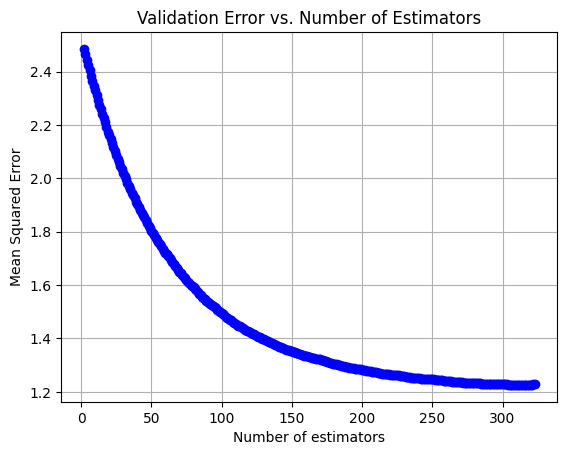

In [ ]:
plt.plot(range(2, len(errors) + 2), errors, marker='o', linestyle='-', color='b')
plt.xlabel('Number of estimators')
plt.ylabel('Mean Squared Error')
plt.title('Validation Error vs. Number of Estimators')
plt.grid(True)

-Biểu đồ trên cho ta biết Validation Error thay đổi như thế nào khi n_estimators tăng dần trong khoảng [2, 500]. Trong khoảng [2, 100], ta có thể thấy Validation Error giảm khá nhanh. Trong khoảng [101, 200], Validation Error có xu hướng giảm chậm lại, và trong khoảng [201, 419], Validation Error giảm rất chậm. Với error_going_up = 10, ta biết rằng Validation Error không thay đổi khi n_estimators = 409.

In [ ]:
best_n_estimators=GBROptimal.n_estimators

In [ ]:
GBROptimal = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,
                                       n_estimators = best_n_estimators, random_state = 42, subsample = 0.5)
GBROptimal.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=323,
                          random_state=42, subsample=0.5)

In [ ]:
# Tính MSE
print(mean_squared_error(y_test, GBROptimal.predict(X_test)))
print(mean_squared_error(y_train, GBROptimal.predict(X_train)))

1.227748461387315
0.9371547151467382


Vậy bộ tham số tối ưu cho GradientBoostingRegressor : learning_rate=0.01, max_depth=5, n_estimators=331, random_state=1, subsample=0.5

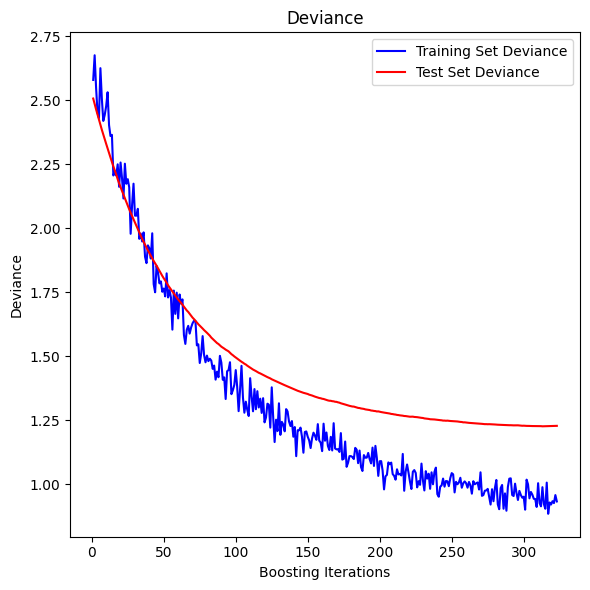

In [ ]:
# Trực quan hóa deviance
params=GBROptimal.get_params()
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(GBROptimal.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))

plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    GBROptimal.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    test_score,
    "r-",
    label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")

fig.tight_layout()
plt.show()

- Biểu đồ trên cho ta biết sự khác nhau giữa error khi huấn luyện (đường màu xanh) và error khi test (đường màu đỏ, đã được vẽ độc lập ở trên) với cùng 1 giá trị n_estimators cho trước. Nhìn chung, error khi huấn luyện có xu thế giảm như error khi test.

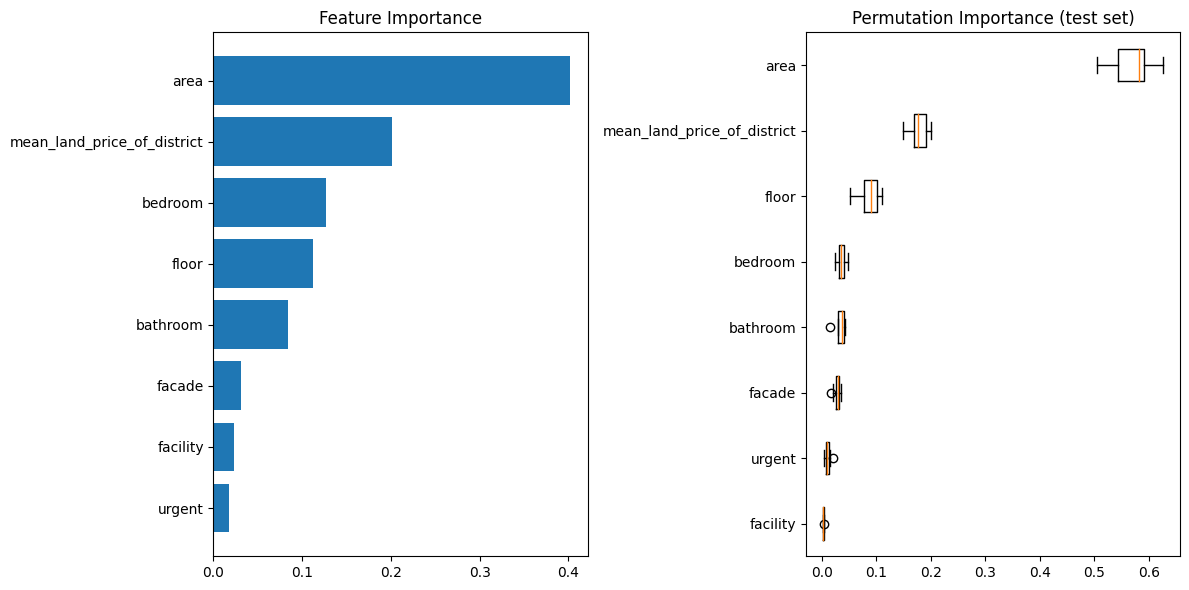

In [ ]:
from sklearn.inspection import permutation_importance

fig = plt.figure(figsize=(12, 6))

# Feature importance
feature_importance = GBROptimal.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns.drop('price'))[sorted_idx])
plt.title("Feature Importance")

# Permutation Importance
result = permutation_importance(
    GBROptimal, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (test set)")

fig.tight_layout()
plt.show()

- Biểu đồ Feature Importance cho ta biết rằng thuộc tính area có ảnh hưởng lớn nhất và thuộc tính urgent có ít ảnh hưởng nhất đến mô hình. Do Feature Importance có thể bị ảnh hưởng bởi hiện tượng overfitting với câc mô hình sử dụng cây, ta tạo thêm biểu đồ Permutation Importance để đối chiếu. Permutation Importance là một cách khác để đánh giá độ quan trọng của dữ liệu, nhưng khác với Feature Importance, nó không bị ảnh hưởng bởi loại mô hình. Biểu đồ Feature Importance ủng hộ kết luận được rút ra từ biểu đồ Feature Importance: thuộc tính area vẫn có ảnh hưởng lớn nhất, trong khi thuộc tính urgent vẫn là thuộc tính có ít ảnh hưởng nhất đến mô hình.

# **Stacking model**

Trong machine learning, stacking là một kỹ thuật kết hợp (ensemble technique) được sử dụng để cải thiện độ chính xác dự đoán của mô hình. Kỹ thuật này kết hợp các dự đoán từ nhiều mô hình học máy khác nhau và sử dụng chúng để tạo ra dự đoán cuối cùng. Ý tưởng chính của stacking là sử dụng đầu ra của các mô hình học máy cơ sở (base models) làm đầu vào cho một mô hình học máy khác, được gọi là mô hình tổ hợp (meta model) hoặc mô hình stacking.

Điểm mạnh của của stacking bao gồm:
- Cải thiện độ chính xác: Kết hợp các dự đoán từ nhiều mô hình có thể cải thiện độ chính xác so với việc sử dụng từng mô hình độc lập.
- Giảm overfitting: Khi sử dụng mô hình stacking, có thể giảm thiểu hiện tượng overfitting so với việc chỉ sử dụng một mô hình phức tạp.
- Tuy nhiên, stacking cũng có thể đòi hỏi nhiều thời gian và tài nguyên để điều chỉnh các base model và meta model để đạt được hiệu suất tối ưu.


In [8]:
class StackingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5, random_state=None):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        self.random_state = random_state

    def fit(self, X, y):
        self.base_models_ = [list() for _ in self.base_models]  #Tạo list để chứa những base model được huấn luyện trên từng phần của tập train.
        self.meta_model_ = clone(self.meta_model)   # Tạo một sao chép của meta model để việc train sẽ không ảnh hưởng bộ tham số khi ta truyền vào.
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=self.random_state) # Sử dụng Kfold cho việc chia tập train ra thành nhiều phần cho việc dự đoán chéo.
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models))) # Tạo list dự đoán tập train sau khi huấn luyện base model và dùng list này để huấn huyện meta model
        for i, reg in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):   # Chia tập train thành nhiều phần bằng nhau.
                instance = clone(reg)       #Tạo một sao chép của base model  để việc train sẽ không ảnh hưởng bộ tham số khi ta truyền vào.
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])  # Cho một model của từng loại model huấn luyện trên (n_folds - 1) phần của tập train sau khi split.
                y_pred = instance.predict(X[holdout_index])   # Lấy model đó đem đi dự đoán phần chưa được huấn luyện
                out_of_fold_predictions[holdout_index, i] = y_pred  # Thêm kết quả dự đoán đó vào list đã tạo sẵn
        self.meta_model_.fit(out_of_fold_predictions, y) # Sau khi cho n_folds model mô hình của mỗi loại mô hình huấn luyện và dự đoán ra kết quả, dùng tập dự đoán đó để huấn luyện meta model
        return self

    def predict(self, X):
        meta_features = np.column_stack([   # Tạo meta feature bằng cách lấy mean giá trị dự đoán của các mô hình trong từng loại mô hình cho mỗi điểm dữ liệu.
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features) # Cho meta model dự đoán

In [14]:
# Tạo base_model
#Những base_model là GradientBoosting, RandomForest, Support Vector Regressor với bộ siêu tham số tốt những đã làm ở trên
best_GB=GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,
                                       n_estimators = 323, random_state = 42, subsample = 0.5)
best_RF=RandomForestRegressor(ccp_alpha= 0.0, max_depth= 10, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators=500)
best_SVR=SVR(kernel='rbf', C=1, epsilon=0.33598182862837817, gamma=0.1)
base_model=[best_SVR,best_GB,best_RF]
best_GB.fit(X_train, y_train)
best_RF.fit(X_train, y_train)
best_SVR.fit(X_train, y_train)
#Tạo meta_model
#Những meta_model là những model đơn giản với bộ tham số đã được tối ưu như Rigde, ElasticNet, Lasso
meta_model=lasso_best

In [15]:
stacking_model = StackingModels(base_models=base_model, meta_model=meta_model, n_folds=5, random_state=42)

In [16]:
stacking_model.fit(X_train, y_train)

StackingAveragedModels(base_models=[SVR(C=1, epsilon=0.33598182862837817,
                                        gamma=0.1),
                                    GradientBoostingRegressor(learning_rate=0.01,
                                                              max_depth=5,
                                                              n_estimators=323,
                                                              random_state=42,
                                                              subsample=0.5),
                                    RandomForestRegressor(max_depth=10,
                                                          max_features='log2',
                                                          min_samples_leaf=5,
                                                          min_samples_split=10,
                                                          n_estimators=500)],
                       meta_model=Lasso(alpha=0.02782559402207126),
                       random_state=42)

In [17]:
# tính MSE của stacking model sau khi train
y_pred = stacking_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

In [18]:
mae

0.8237534167017448

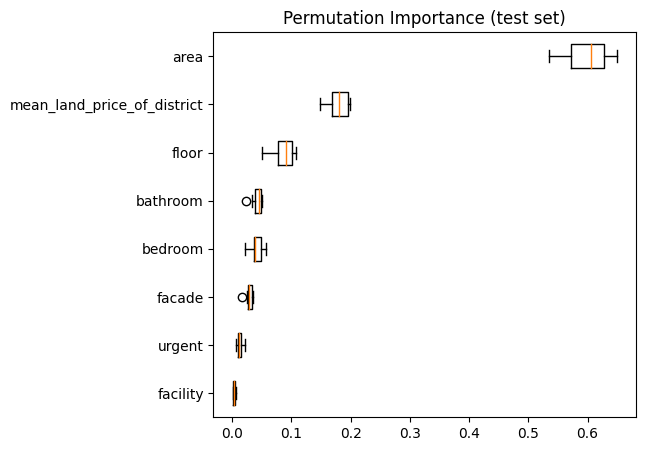

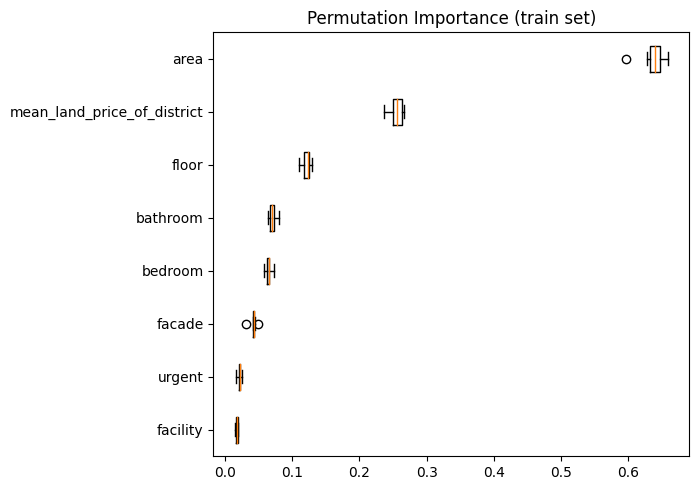

In [19]:
#Kiểm tra tính quan trọng của từng feature trên các tập train và test
result_test = permutation_importance(
    stacking_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result_test.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(
    result_test.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (test set)")

result_train = permutation_importance(
    stacking_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result_train.importances_mean.argsort()
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.boxplot(
    result_train.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns.drop('price'))[sorted_idx],
)
plt.title("Permutation Importance (train set)")
fig.tight_layout()
plt.show()

Bằng cách sử dụng phương thức permutation_important của thư viện để kiểm tra độ quan trọng của các đặc trưng trong hai tập train và test, ta rút ra các kết luận sau:
- Sử dụng các mô hình phức tạp như SVR, RandomForest và GradientBoosting để tìm ra những đặc trưng và phát hiện mới mà mô hình tuyến tính không giải quyết được, sau đó sử dụng mô hình đơn giản hơn là Lasso để đưa ra dự đoán cuối cùng thì cả trên hai tập train và test mô hình stacking đều đưa ra độ quan trọng của các đặc trưng trên cả hai tập như nhau
- Các đặc trưng quan trọng nhất trong bài toán phân loại giá nhà như là Area, mean_land_price_of_district đều có độ quan trọng cao trong tất cả cấc mô hình mà chúng ta đã thử nghiệm, chính vì thế đây được xem là hai đặc trưng quan trọng nhất.
-Các đặc trưng như là floor, bedroom, bathroom là những đặc trưng trung bình và cần được xem xét khi ta muốn thay đổi độ chính xác của mô hình.
-Ba đặc trưng còn lại là facade, urgent, facility là những dặc trưng yếu khi độ đóng góp vào target là khá thấp.


# **COMPARISION**

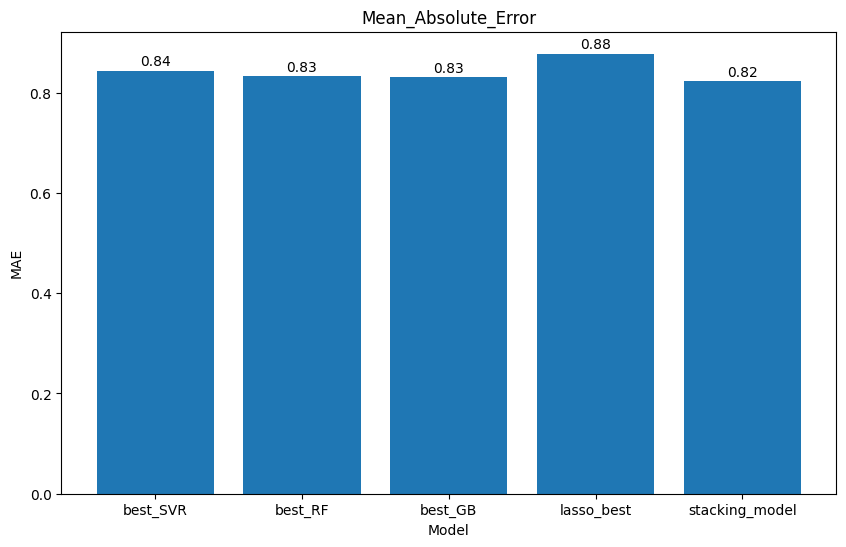

In [ ]:
#Vẽ biểu đồ cột thể hiện MAE của best_SVR,best_RF, best_GB, lasso_best và stacking_model
plt.figure(figsize=(10,6))
mae_values = [mean_absolute_error(y_test, best_SVR.predict(X_test)),
             mean_absolute_error(y_test, best_RF.predict(X_test)),
             mean_absolute_error(y_test, best_GB.predict(X_test)),
             mean_absolute_error(y_test, lasso_best.predict(X_test)),
             mean_absolute_error(y_test, stacking_model.predict(X_test))]
plt.bar(x=['best_SVR','best_RF','best_GB','lasso_best','stacking_model'],
        height=mae_values)
# Hiển thị giá trị MAE trên mỗi cột
for i, v in enumerate(mae_values): # Iterate over calculated MAE values
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')  # Thêm giá trị MAE trên cột
plt.title('Mean_Absolute_Error')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

 Dựa vào biểu đồ so sánh ta có thể thấy, những mô hình đơn giản như linear regression không cho độ chính xác cao bằng những mô hình phức tạp, là những mô hình có thể phát hiện ra những quan hệ phi tuyến trong bộ giữa liệu.


# **CONCLUSION**

###Kết luận:
1.	Crawl Data, sử dụng LLM
-	Dùng Beautiful Soup để cào dữ liệu đã phân tích ra được chính xác 5000 thông tin bán nhà ở Tp.HCM đúng với format từ HTML của web
-	Qua việc sử dụng LLM, ở đây là Llama3-70B đã phân tích được dữ liệu phi cấu trúc (description_title) từ tập data đã crawl trước đó
2.	Làm sạch dữ liêu, EDA, Feature Engineering
-	Sử dụng thư viện numpy, pandas để xử lý và xóa các giá trị bị lỗi
-	Sử dụng Regex xử lý được các dữ liệu kiểu chuỗi
-	Ngoài ra, áp dụng lại LLM giúp nhận biết thêm các giá trị ở phần Address
-	EDA: Sử dụng thư viện matplotlib hỗ trợ việc Trực quan hóa các dữ liệu giúp nhận biết outliers và phân tích tập dữ liệu hiện có
-	Feature Engineering: Từ việc phân tích tập dữ liệu, tạo ra thêm các thuộc tính mới kế thừa từ các thuộc tính trước và đồng thời bỏ đi nhiều thuộc tính không phù hợp với tập dữ liệu
-	Từ bước làm sạch dữ liệu, áp dụng EDA và Feature Engineering đã cho ra được một tập dữ liệu hoàn chỉnh, không outliers, không có các giá trị trống, dùng được cho việc chạy các mô hình
3.	Chạy các mô hình linear regression, support vector machine, random forest và gradient boosting, stacking model.

-	Về kết quả: Mô hình stacking cho ra kết quả tốt nhất, theo sau đó lần lược là Random Forest và Gradient Boosting với kết quả xấp xỉ nhau, Support Vector Machine và Linear Regression sử dụng hồi quy Lasso cho kết quả kém nhất. Các kết quả của mô hình không có cách biệt lớn.

-	Về thời gian: Linear Regression có thời gian nhanh nhất, kế đến lần lượt là Support Vector Machine, Gradient Boosting, Random Forest và mô hình Stacking Model tốn nhiều thời gian để học nhất.

-	Nếu ta cần tối ưu thời gian chạy trong khi vẫn muốn thu kết quả không quá thấp, ta nên sử dung mô hình Gradient Boosting hoặc Random Forest thay vì mô hình Stacking.

-	Mô hình Linear Regression sử dụng hồi quy Lasso cho kết quả kém nhất nhưng sai số mean_square_error của mô hình không quá chênh lệch so với các mô hình còn lại và lại có tốc độ học nhanh nhất. Vì thế nếu thời gian chạy là yếu tố cần ược ưu tiên, ta có thể sử dụng mô hình này.

-	Support Vector Machine cho kết quả gần giống với mô hình Random forest hoặc Gradient Boosting, dù kém hơn chút nhưng ít thời gian để học hơn. Do đó, ta sẽ sử dụng mô hình này khi ta muốn thu kết quả tốt nhất với thời gian chạy ít nhất.

- Sử dụng permutation_important thì các mô hình đều cho ra các nhóm feature quan trọng là như nhau. Khi ở nhóm quan trọng nhất, Area và mean_land_price_of_district là hai đặc trưng ảnh hưởng lớn nhất và rõ rệt so với các đặc trưng còn lại. Nhóm trung bình là floor, bathroom, bedroom đều cho kết quả không quá thấp, nhóm nay sẽ được tập trung xem xét khi price và mean_land_price_of_district giữa những ngôi nhà có giá trị bằng nhau. Nhóm đặc trưng không quá quan trọng là urgent, facade và facility là những đặc trưng yếu.

-	Như vậy mỗi mô hình đều có điểm mạnh và yếu khi xét đến kết quả và thời gian, tùy vào tiêu chí cần thiết của mình mà có thể lựa chọn mô hình nào mong muốn thực hiện
